# Importing Libraries

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cost Function

In [132]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost_sum = 0
    
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    total_cost = (1 / (2 * m)) * cost_sum

    return total_cost

# Gradient Function

In [133]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros((n, ))
    dj_db = 0.
    
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        err_i = f_wb - y[i]
        dj_dw += err_i * x[i]
        dj_db += err_i
    
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

# Gradient Descent

In [134]:
def gradient_descent(x, y, w_in, b_in, alpha, iterations):
    w = w_in
    b = b_in
    cost_history = []
    
    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = compute_cost(x, y, w, b)
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration: {i}  Cost: {cost}")
        
    return w, b, cost_history

# Loading the dataset

In [135]:
df = pd.read_csv('../Datasets/linear_regression_synthetic_dataset.csv')
train_df = df.iloc[:6000]
print("Loaded")

Loaded


# Model for __FMA - UE Current__ Setup

In [136]:
X_train = train_df[['accuracy_pct', 'reaction_time_ms', 'waves_survived']].values
y_current = train_df['fma_ue_baseline'].values

# scaling the values
scaler_X = StandardScaler()
X_norm = scaler_X.fit_transform(X_train)

scaler_y = StandardScaler()
y_norm = scaler_y.fit_transform(y_current.reshape(-1, 1)).flatten()

# Initial Parameters

In [137]:
w_init = 0
b_init = 0
iterations = 1000
alpha = 1e-2

w_final, b_final, cost_history = gradient_descent(X_norm, y_norm, w_init, b_init, alpha, iterations)
print("Trained")

print(f"w: {w_final}, b: {b_final}")

Iteration: 0  Cost: [0.4917373 0.4917373 0.4917373]
Iteration: 100  Cost: [0.22816101 0.22816101 0.22816101]
Iteration: 200  Cost: [0.21366052 0.21366052 0.21366052]
Iteration: 300  Cost: [0.21279076 0.21279076 0.21279076]
Iteration: 400  Cost: [0.21272713 0.21272713 0.21272713]
Iteration: 500  Cost: [0.21272066 0.21272066 0.21272066]
Iteration: 600  Cost: [0.21271972 0.21271972 0.21271972]
Iteration: 700  Cost: [0.21271955 0.21271955 0.21271955]
Iteration: 800  Cost: [0.21271951 0.21271951 0.21271951]
Iteration: 900  Cost: [0.2127195 0.2127195 0.2127195]
Trained
w: [ 0.45759924 -0.09159508  0.42568917], b: [-3.36334849e-16 -3.36334849e-16 -3.36334849e-16]


# Plotting the __LOSS__ vs __ITERATIONS__

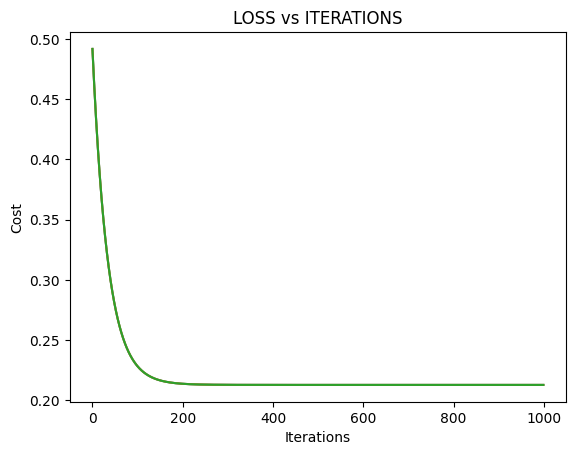

In [138]:
plt.plot(cost_history)
plt.title("LOSS vs ITERATIONS")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()